In [2]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

In [ ]:
#Carga desde un archivo .csv sin indice
data= pd.read_csv('Ventas_Totales_Limpio.csv')
data= data.drop(['Unnamed: 0'], axis=1)
data

In [ ]:
#Corroboramos valores nulos
valores_nulos=data.isnull().sum()
valores_nulos

PROCEDIMIENTO PARA SEPARAR DATAFRAME EN 2 PARTES (CUANTITATIVAS Y CUALITATIVAS)

In [ ]:
#Verificamos información del DataFrame
data.info()

In [ ]:
#Filtro para obtener variables cuantitativas
Cuantitativas=data.iloc[ : , [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]]
Cuantitativas

In [ ]:
#Filtro para obtener variables cualitativas
Cualitativas=data.iloc[ : , [0]]
Cualitativas

In [ ]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
Cuantitativas.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama


PROCEDIMIENTO "DESVIACIÓN ESTÁNDAR" PARA ELIMINAR OUTLIERS EN DATAFRAME

In [ ]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y=Cuantitativas
Limite_Superior = y.mean() + 3*y.std()
Limite_Inferior = y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

In [30]:
# Ajustar maximo de filas
pd.options.display.max_rows = None

In [ ]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
Datos_sin_Outliers= Cuantitativas[(y<=Limite_Superior)&(y>=Limite_Inferior)]
Datos_sin_Outliers

In [ ]:
#Corroboramos valores nulos
valores_nulos=Datos_sin_Outliers.isnull().sum()
valores_nulos

In [ ]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean=Datos_sin_Outliers.copy()
data_clean=data_clean.fillna(round(Datos_sin_Outliers.mean(),1))
data_clean

In [ ]:
#Corroboramos valores nulos
valores_nulos=data_clean.isnull().sum()
valores_nulos

In [42]:
# Descargar archivo
data_clean.to_csv("Ventas_Totales_Limpio_Sin_Nulos.csv")
files.download("Ventas_Totales_Limpio_Sin_Nulos.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1500x800 with 0 Axes>

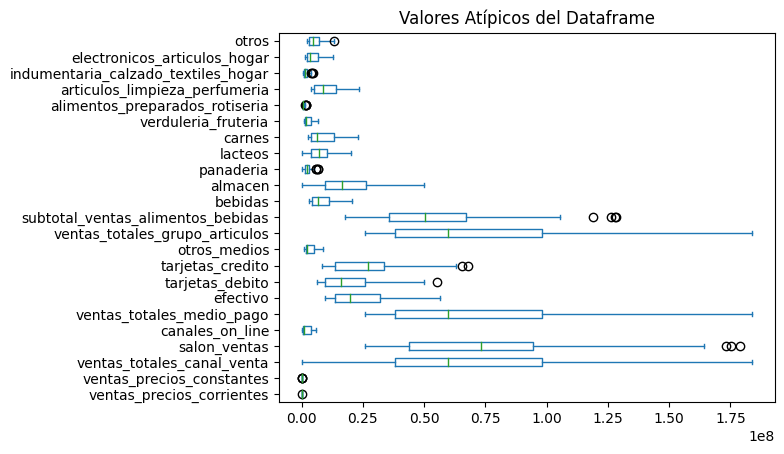

In [44]:
# Diagrama de Caja Bigote
fig = plt.figure(figsize =(15, 8))            # Tamaño de la figura
data_clean.plot(kind='box', vert=False)         # Ploteamos las variables cuantitativas, seleccionamso el diagrama de caja bigote
                                              # Y se hace vertical

plt.title("Valores Atípicos del Dataframe")   # Titulo de la grafica
plt.show()                                    # Para mostrar la grafica

PROCEDIMIENTO "CUARTILES" PARA SUSTITUIR OUTLIERS EN DATAFRAME

In [ ]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=Cuantitativas

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

In [ ]:
#Obtenemos datos limpios del Dataframe
Datos_sin_Outliers_iqr= Cuantitativas[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
Datos_sin_Outliers_iqr

In [ ]:
#Corroboramos valores nulos
valores_nulos=Datos_sin_Outliers_iqr.isnull().sum()
valores_nulos

In [ ]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean_iqr=Datos_sin_Outliers_iqr.copy()
data_clean_iqr=data_clean_iqr.fillna(round(Datos_sin_Outliers_iqr.mean(),1))
data_clean_iqr

In [ ]:
#Corroboramos valores nulos
valores_nulos=data_clean_iqr.isnull().sum()
valores_nulos

In [ ]:
# Diagrama de Caja Bigote
fig = plt.figure(figsize =(15, 8))            # Tamaño de la figura
data_clean_iqr.plot(kind='box', vert=False)         # Ploteamos las variables cuantitativas, seleccionamso el diagrama de caja bigote
                                              # Y se hace vertical

plt.title("Valores Atípicos del Dataframe")   # Titulo de la grafica
plt.show()                                    # Para mostrar la grafica